raise = 4327.656086854015
basis = 45121.849352748985


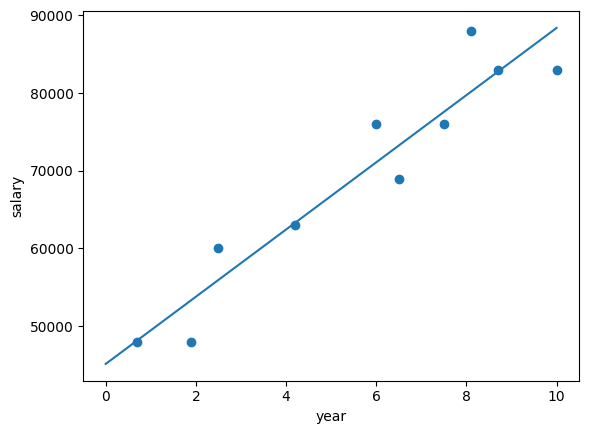

salary at 5: 66760.12978701906
student id: 2021452027
name: 이태환


In [34]:
import numpy as np
import matplotlib.pyplot as plt

salary_and_year = np.array([[83000, 8.7], [88000, 8.1], [48000, 0.7], [76000, 6], [69000, 6.5], [76000, 7.5], [60000, 2.5], [83000, 10], [48000, 1.9], [63000, 4.2]])

# 급여와 근속연수를 분리.
x = salary_and_year[:, 1].reshape(-1, 1)
y = salary_and_year[:, 0].reshape(-1, 1)

# X에 상수 항을 추가.
x = np.concatenate((np.ones_like(x), x), axis=1)

# pseudo inverse를 계산.
x_pinv = np.linalg.pinv(x)

# raise와 basis를 계산.
w = np.dot(x_pinv, y)

w_basis = w[0]
w_raise = w[1]

# 예측된 급여와 실제 급여를 비교할 경력 범위를 생성.
years_of_experience = np.linspace(0, 10)

# 예측된 급여와 실제 급여를 계산.
predicted_salary = w_basis + w_raise * years_of_experience
actual_salary = np.interp(years_of_experience, salary_and_year[:, 1], salary_and_year[:, 0])

# rasie, basis
print("raise =", *w_raise)
print("basis =", *w_basis)

# 그래프.
plt.plot(years_of_experience, predicted_salary)
plt.scatter(salary_and_year[:, 1], salary_and_year[:, 0])
plt.xlabel("year")
plt.ylabel("salary")
plt.show()

# 5년 일한 사람의 급여 구하기.
years_of_experience = 5
predicted_salary = w_basis + w_raise * years_of_experience

# 결과.
print("salary at 5:", *predicted_salary)
print("student id: 2021452027")
print("name: 이태환")